## _**Determining Exercise Boundary for American Options**_

#### Importing Numpy and Matplotlib

In [6]:
import numpy as np
import matplotlib.pyplot as plt

#### Generation of Binomial Stock Price Tree for American Options

In [7]:
def gen_stock_tree(S_0, sigma, T, n):
    dt = T / n
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    S = np.zeros((n + 1, n + 1))
    S[0, 0] = S_0
    for j in range(1, n + 1):
        S[:,j]= S[:,j-1]*u
        S[j,j]=S[j-1,j-1]*d
    return (u,d,S)

#### Defining Exercise Boundary Function - American Put Option

In [8]:
def american_put_boundary(S_0, K, rf, sigma, T, n):
    dt = T / n
    # obtain u, d, S_T from previous function
    u, d, S = gen_stock_tree(S_0, sigma, T, n)
    # risk-neutral probability calculation
    q = (np.exp(rf*dt) - d) / (u - d)
    # Grid (array) for storing option values
    P = np.zeros((n+1, n+1))
    # Initialize a list to store the stock prices that meet the condition
    temp_stock_prices = []

    boundary=np.append(np.full(n - 1, None), K)

    # Nested loop to iterate over nodes of the binomial tree
    for j in range(n-1, -1, -1):
        for i in range(j+1):
            # Calculate option value at node (i, j)
            P[i,j] = max(np.exp(-rf*dt)*(q * P[i,j+1] + (1-q) * P[i+1,j+1]), K - S[i,j])

            # Check if the option is exercised early at this node
            if P[i,j] == K - S[i,j]:
                # If so, store the corresponding stock price in the temporary array
                temp_stock_prices.append(S[i,j])

        # After iterating through all nodes in the current time step, check if temp_stock_prices is not empty
        if temp_stock_prices:
            # Find the maximum stock price from temp_stock_prices
            max_stock_price = max(temp_stock_prices)

            # Insert the maximum stock price into the boundary array at the matching index
            boundary[j] = max_stock_price

            # Clear temp_stock_prices for the next iteration
            temp_stock_prices = []
    
    return (T,boundary )


#### Initializing Input Variables for Exercise Boundary Function

In [9]:
#Input variables
S_0= 100
K= 100
T=0.25
rf=0.1
sigma_values= [0.2,0.4]
n_values=[100,1000]

# Generate exercise boundary for different values of sigma and n
exercise_boundary = {}
for sigma in sigma_values:
    for n in n_values:
        exercise_boundary[(sigma, n)] = american_put_boundary(S_0, K, rf, sigma, T, n)

#### Plotting the results

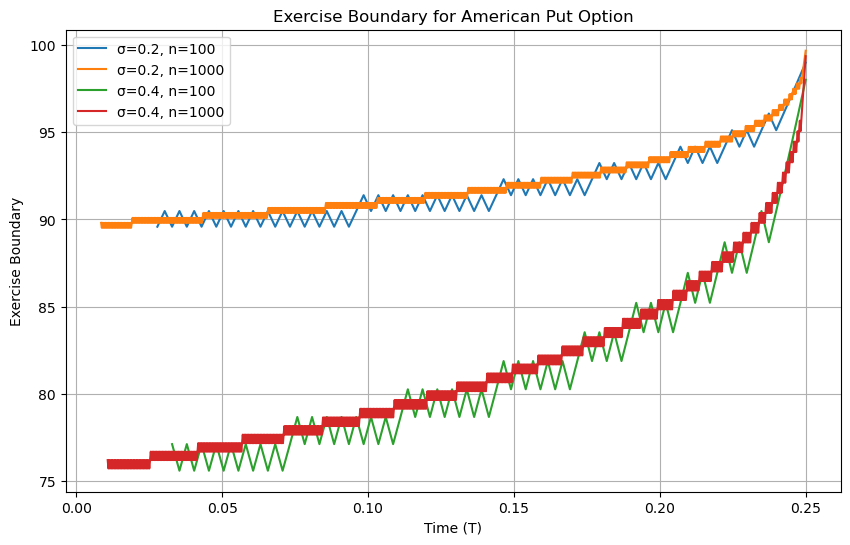

In [10]:
# Plotting the exercise boundary
plt.figure(figsize=(10, 6))
for sigma in sigma_values:
    for n in n_values:
        n1,prices=exercise_boundary[(sigma, n)]
        plt.plot(np.linspace(0, T, n), prices, label=f"σ={sigma}, n={n}")
plt.xlabel('Time (T)')
plt.ylabel('Exercise Boundary')
plt.title('Exercise Boundary for American Put Option')
plt.legend()
plt.grid(True)
plt.show()

#### Difference in Results:

The difference in results between $\sigma = 20\%$ and $\sigma = 40\%$ is as follows:

1. Exercise Boundary Smoothness- Generally a higher value of stock volatility leads to a wider distribution of stock prices which in turn leads to wider spread of exercise boundary values. With $\sigma = 20\%$ volatility, the exercise boundary exhibits a smoother curve with lesser jagged or erratic patterns which are coversely noted along the $\sigma = 40\%$ line seen above. The price movements along the $\sigma = 20\%$ volatility line are comparatively more predictable due to lower variance and may give the option holder the flexibility to hold the option for longer to potentially benefit from favourable stock price movements.

2. Volatility and Early exercise- The unpredictablity of the stock price with higher volatilty leads to higher uncertainity in the market. The Put option holders generally tend to exercise options early to capture potential profits and mitigate probable loses from holding the option for longer time periods. Thus, put options on stocks with higher volatilty are exercised early.